# Sensitivity Analysis 

## Introduction
In this notebook, I present how to calculate the sensitivity of the response (target)
with respect to the factors (features) based on the ordinary least square (OLS) method.
Sensitivity has various definitions for various contexts.For data sets which show
some levels of linearity, the coefficients of the linear regression model can be used
to identify the influence of each factor on the response.

## Methodology
Let x1,x2, ...,xn be the features and y the response, then a linear
model can be written as 
y=a0+a1*x1 + a2*x2+...+an*xn + error (1)
In this model only the primary features are considered polynomial terms (interaction terms) can 
also be included.

After finding the suitable set of coefficients a_i by minimizing the L2 norm of the error, we
can determine the influence of each parameter by comparing the absolute value of the associated
coefficient. Basically, we calculate dy/dx_i as the sensitivity of y with respect to x_i (other parameters constant).

The sensitivity in this case may be interpreted as one unit of increase in x_i leads to a_i unit
of increase or decrease in y. 

It is important to note that the coefficient matrix must be appropriately standardized so that
all parameters values are in the same range e.g. [0,1].

In the same vein, we can establish a linear model of the form

log(y) = b_0+b_1*log(x_1)+b_2*log(x_2)+...+b_n*log(x_n) + error. (2)

The coefficients in this case, represent the elasticity of the target
to the change in the input parameters. Mathematically,
b_i= (dy/y)/(dx/x). (3)
In other words, 1% of change in the input leads to b_i% of change in the output.
the formula above can be obtained by tkaing the differential form both sides of Eq(2).

## Data 

### source
The data set to be studied is taken from this [website](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x08.txt).
I am not sure whether this data represents real-life situation or not but it serves the 
porpuse of this investigation.

### synopsis
The description provided with the data (see [data file](./data_info.txt)) is sufficient.
The data set lists the number of murder per million population per annum for 20
regions with various populations; for each region, the percentage of population
whose income is less than 5000 dollars and the percentage of unemployment is also specified.
More insights is provided along side the calculations of this note book.

It should be noted that, I do not engage in discussing the validity of these features 
and their relation with respect to each other. One might argue that
people with income less than 5000 dollars are unemployed and receive some sort of
social welfare; hence the two features are not independent. I avoid these considerations.
I take the data as is for the sole purpose of demonstrating how sensitivity can be calculated and interpreted.

## Goal
The goal is to find out which parameter (population, income factor and unemployment) has
the largest influence on the muerder rate.

## Author
Mehdi Paak

## License
This project is licensed under the MIT License - see the [LICENSE](./LICENSE)  file for details.

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn import preprocessing

sns.set()
%matplotlib inline

In [2]:
path = r'.'
All_Data = np.loadtxt(os.path.join(path,'data.txt'))

In [3]:
All_Data.shape

(20, 5)

In [4]:
df=pd.DataFrame(All_Data[:,1:],columns=['population','pop_inc_b5k','unemployment','murder'])

In [5]:
df

,population,pop_inc_b5k,unemployment,murder
0,587000.0,16.5,6.2,11.2
1,643000.0,20.5,6.4,13.4
2,635000.0,26.3,9.3,40.7
3,692000.0,16.5,5.3,5.3
4,1248000.0,19.2,7.3,24.8
5,643000.0,16.5,5.9,12.7
6,1964000.0,20.2,6.4,20.9
7,1531000.0,21.3,7.6,35.7
8,713000.0,17.2,4.9,8.7
9,749000.0,14.3,6.4,9.6


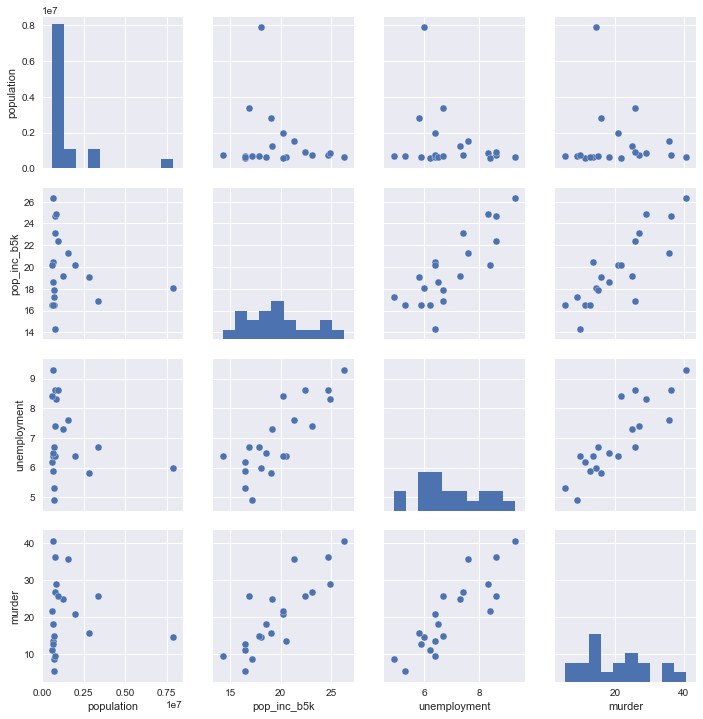

In [9]:
sns.pairplot(df)

## Remark 1
The pair plot above depicts a linear variation between murder, income factor and unemployment.
No particular correlation is observed between murder and the population.
This is because the murder count is somehow normalized against population by presenting it 
as murder per million population per annum. As such, we drop the population as
a parameter. 

In the following the analysis is continued with murder as the target (y) and income factor
and the unemployment percentage as features.

In [56]:
X=df.loc[:,['pop_inc_b5k','unemployment']].values
y=df.loc[:,'murder']

In [57]:
X

array([[16.5,  6.2],
       [20.5,  6.4],
       [26.3,  9.3],
       [16.5,  5.3],
       [19.2,  7.3],
       [16.5,  5.9],
       [20.2,  6.4],
       [21.3,  7.6],
       [17.2,  4.9],
       [14.3,  6.4],
       [18.1,  6. ],
       [23.1,  7.4],
       [19.1,  5.8],
       [24.7,  8.6],
       [18.6,  6.5],
       [24.9,  8.3],
       [17.9,  6.7],
       [22.4,  8.6],
       [20.2,  8.4],
       [16.9,  6.7]])

## Min Max standardization
In the following, feature columns are standardized to be in the range [0,1].
It makes the the coefficents comparable and better interpretable.
In addition,it helps acheiving a better condition number for OLS numerical calculations.


In [58]:
mms=preprocessing.MinMaxScaler()
X=mms.fit_transform(X)

In [59]:
X

array([[0.18333333, 0.29545455],
       [0.51666667, 0.34090909],
       [1.        , 1.        ],
       [0.18333333, 0.09090909],
       [0.40833333, 0.54545455],
       [0.18333333, 0.22727273],
       [0.49166667, 0.34090909],
       [0.58333333, 0.61363636],
       [0.24166667, 0.        ],
       [0.        , 0.34090909],
       [0.31666667, 0.25      ],
       [0.73333333, 0.56818182],
       [0.4       , 0.20454545],
       [0.86666667, 0.84090909],
       [0.35833333, 0.36363636],
       [0.88333333, 0.77272727],
       [0.3       , 0.40909091],
       [0.675     , 0.84090909],
       [0.49166667, 0.79545455],
       [0.21666667, 0.40909091]])

In [73]:
# Add column 1 for the intercept.
rows=len(df.index)
X=np.column_stack((np.ones((rows,1)),X))

In [74]:
X

array([[1.        , 0.18333333, 0.29545455],
       [1.        , 0.51666667, 0.34090909],
       [1.        , 1.        , 1.        ],
       [1.        , 0.18333333, 0.09090909],
       [1.        , 0.40833333, 0.54545455],
       [1.        , 0.18333333, 0.22727273],
       [1.        , 0.49166667, 0.34090909],
       [1.        , 0.58333333, 0.61363636],
       [1.        , 0.24166667, 0.        ],
       [1.        , 0.        , 0.34090909],
       [1.        , 0.31666667, 0.25      ],
       [1.        , 0.73333333, 0.56818182],
       [1.        , 0.4       , 0.20454545],
       [1.        , 0.86666667, 0.84090909],
       [1.        , 0.35833333, 0.36363636],
       [1.        , 0.88333333, 0.77272727],
       [1.        , 0.3       , 0.40909091],
       [1.        , 0.675     , 0.84090909],
       [1.        , 0.49166667, 0.79545455],
       [1.        , 0.21666667, 0.40909091]])

In [122]:
# performing the OLS
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 murder   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     34.43
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           1.05e-06
Time:                        16:44:51   Log-Likelihood:                -57.484
No. Observations:                  20   AIC:                             121.0
Df Residuals:                      17   BIC:                             124.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9845      2.148      2.321      0.033       0.453       9.515
x1            14.6872      6.818      2.154      0.046       0.301      29.073
x2            19.3553      6.715      2.882      0.010       5.188      33.523
==============================================================================
Omnibus:                        4.394   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.526
Skew:                           0.834   Prob(JB):                        0.283
Kurtosis:                       3.501   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R^2
The coefficient of determination is about 0.8 which indicates
a good fit for this problem. The t and F statistics can also be studied
for more insights. This, however, is not the purpose of the present work.

In [76]:
lbl_map = {'x1':'income factor','x2':'unemployment'}

In [77]:
reg.params

const     4.984461
x1       14.687168
x2       19.355318
dtype: float64

In [123]:
coeff_numi = reg.params.iloc[1:X.shape[1]]
coeff_numi.rename(lbl_map,inplace=True)
coeff_numi_abs = coeff_numi.map(abs)
coeff_numi_abs.sort_values(ascending=False,inplace=True)
clrs = ['grey' if x<0 else 'black' for x in coeff_numi.values ]

In [124]:
coeff_numi_abs

unemployment     19.355318
income factor    14.687168
dtype: float64

## Sensitivity 1
The following Pareto chart shows that unemployment and income factor both have 
a positive impact on the murder; that is an increase in those factors leads
leads to an increase in the murder. The unemployment has a larger influence
on the murder than income factor though by a small amount. A unit increase in
unemployment leads to 19.35 unit increase in murder.

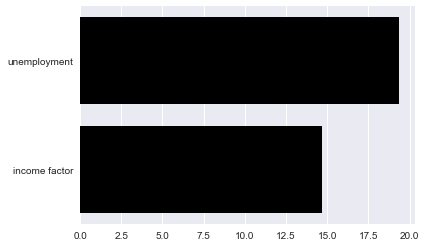

In [125]:
pareto = sns.barplot(x=coeff_numi_abs[0:], y=coeff_numi_abs.index[0:],palette=clrs)

## Remark 2
To calculate the sensitivity based on the elasticity of the response,
I create a log transformed version of the data. 
The pair plot that follows indicates linearity among
data.

In [109]:
XX=df.loc[:,['pop_inc_b5k','unemployment']].values
yy=df.loc[:,'murder']
XX=np.log(XX)
yy=np.log(yy)

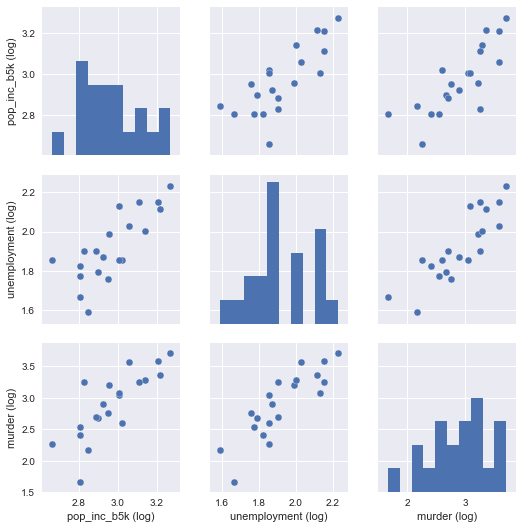

In [113]:
df2=pd.DataFrame(np.column_stack((XX,yy)),columns=['pop_inc_b5k (log)','unemployment (log)','murder (log)'])
sns.pairplot(df2)

In [114]:
df2.head()

,pop_inc_b5k (log),unemployment (log),murder (log)
0,2.803360,1.824549,2.415914
1,3.020425,1.856298,2.595255
2,3.269569,2.230014,3.706228
3,2.803360,1.667707,1.667707
4,2.954910,1.987874,3.210844


## Min Max standardization

In [115]:
mms=preprocessing.MinMaxScaler()
XX=mms.fit_transform(XX)

rows=len(df.index)
XX=np.column_stack((np.ones((rows,1)),XX))


In [116]:
model = sm.OLS(yy,XX)
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 murder   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     29.85
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.74e-06
Time:                        15:28:04   Log-Likelihood:               -0.17478
No. Observations:                  20   AIC:                             6.350
Df Residuals:                      17   BIC:                             9.337
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9512      0.137     14.255      0.000       1.662       2.240
x1             0.6719      0.365      1.842      0.083      -0.098       1.442
x2             1.1723      0.359      3.268      0.005       0.415       1.929
==============================================================================
Omnibus:                        1.028   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.120
Skew:                          -0.040   Prob(JB):                        0.942
Kurtosis:                       3.371   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
coeff_numi = reg.params.iloc[1:X.shape[1]]
coeff_numi.rename(lbl_map,inplace=True)
coeff_numi_abs = coeff_numi.map(abs)
coeff_numi_abs.sort_values(ascending=False,inplace=True)
clrs = ['grey' if x<0 else 'black' for x in coeff_numi.values ]

In [118]:
coeff_numi_abs

unemployment     1.172303
income factor    0.671902
dtype: float64

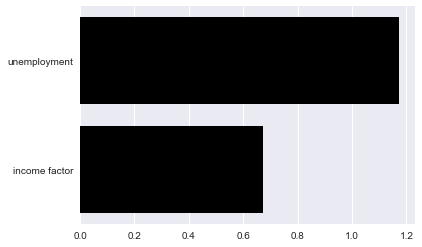

In [121]:
pareto = sns.barplot(x=coeff_numi_abs[0:], y=coeff_numi_abs.index[0:],palette=clrs)

## sensitivity
The sensitivity based on response elasticity shows that 1% change
in unemployment leads to 1.17 % change in the murder while
1% change in income factor leads to 0.67% change in murder.
We conclude that unemployment has greater influence on murder than
the income factor, albeit not significantly.

In [96]:
## uncomment if you want to save the figure as a png.
#fig = numi_pareto.get_figure()
#fig.savefig('pareto_sensitivity.png')